# Image Classification with TensorFlow

# RESNET MODEL

# Packages Required

In [132]:
import tensorflow as tf
import keras
import PIL.Image as pil
import pathlib
from glob import glob
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Length of Test/Train Data for Fruit Dataset

In [133]:
# Counting images and setting up path

training_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Training/')
test_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Validation/')
train_count = len(list(training_dir.glob('*/*.jpg')))
test_count = len(list(test_dir.glob('*/*.jpg')))
print("Number of training images:", train_count)
print("Number of training images:", test_count)

Number of training images: 35133
Number of training images: 11804


# Load Test/Train Data

In [134]:
img_height = 100
img_width = 100
batch_size = 128

# Loading training data

train_ds = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Loading test data

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35133 files belonging to 70 classes.
Found 11804 files belonging to 70 classes.


# Labels

In [135]:
# Get class names

class_names = train_ds.class_names
num_classes = len(class_names)
class_names[:5]

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith']

# Preview Fruit Images

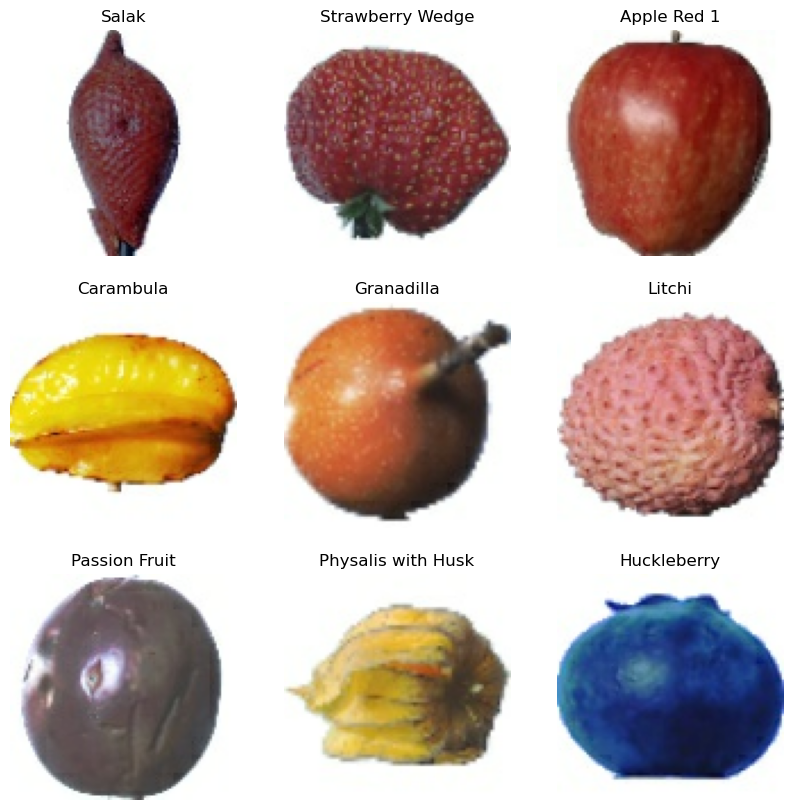

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# ResNet Base Model

In [137]:
# re-size all the images to this
IMAGE_SIZE = [100, 100] 
class_len = 70 # Classes in fruits dataset

# training configuration:
batch_size = 128

# resnet base model
res = ResNet50(
    input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# include_top = false, whether to include the fully-connected layer at the top of the network.
# weights = imagenet, 'imagenet' (pre-training on ImageNet)
# input_shape, It should have exactly 3 inputs channels, and width and height should be no smaller than 32.

# don't train existing weights (runs forever lol)
for layer in res.layers:
    layer.trainable = False

# Layers and Softmax Func

In [138]:
# layers - can add more if needed
x = Flatten()(res.output)

# can also use relu for example
prediction = Dense(class_len, activation='softmax')(x)

# Initial Model Instance

In [139]:
#  model object
model = Model(inputs=res.input, outputs=prediction)

# structure of the model
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 25, 25, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 25, 25, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 25, 25, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 25, 25, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 13, 13, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 13, 13, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 13, 13, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 13, 13, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 7, 7, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 7, 7, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 7, 7, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

# Cost and Optimization for ResNet

In [140]:
#  cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy', #sparse because rgb image representation this time.
  optimizer='adam', # can also use SGD for gradient descent or Adam algorithm
  metrics=['accuracy'] # model accuracy metric
)

# Image Data Processing 
- The ImageDataGenerator is a class in Keras that is imported like any other object in the library. The generator will run through your image data and apply random transformations to each individual image as it is passed to the model so that it never sees the exact same image twice during training.

In [141]:
# Generate batches of tensor image data with real-time data augmentation.

train_gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [142]:
# These will be needed for generators,
training_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Training/')
test_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Validation/')

# Test ImageDataGenerator

In [143]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot 
test_gen = val_gen.flow_from_directory(test_dir, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k

Found 11804 images belonging to 70 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Cantaloupe 1': 16, 'Cantaloupe 2': 17, 'Carambula': 18, 'Cherry 1': 19, 'Cherry 2': 20, 'Cherry Rainier': 21, 'Clementine': 22, 'Cocos': 23, 'Dates': 24, 'Granadilla': 25, 'Grape Pink': 26, 'Grape White': 27, 'Grape White 2': 28, 'Grapefruit Pink': 29, 'Grapefruit White': 30, 'Guava': 31, 'Huckleberry': 32, 'Kaki': 33, 'Kiwi': 34, 'Kumquats': 35, 'Lemon': 36, 'Lemon Meyer': 37, 'Limes': 38, 'Litchi': 39, 'Mandarine': 40, 'Mango': 41, 'Maracuja': 42, 'Melon Piel de Sapo': 43, 'Mulberry': 44, 'Nectarine': 45, 'Orange': 46, 'Papaya': 47, 'Passion Fruit': 48, 'Peach': 49, 'Peach Flat': 50, 'Pear': 51, 'Pear Abate': 52, 'Pear Monster': 5

# Generators for Model (Test/Train)

In [144]:
# create generators
train_generator = train_gen.flow_from_directory(
  training_dir,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)

test_generator = val_gen.flow_from_directory(
  test_dir,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 35133 images belonging to 70 classes.
Found 11804 images belonging to 70 classes.


# Fit the Model

In [145]:
train_steps = 35133 # len of the sets
test_steps = 11804

# training configuration:
epochs = 3
batch_size = 128
# when using a larger batch there is a significant degradation in the quality of the model, 
# but resnet is many layers, large model  complexity takes a long time to run. will change batch size to 16 using diff pc,
# so run takes shorter amount of time.

r = model.fit(
  train_generator, # xtrain
  validation_data=test_generator, #ytrain
  epochs=epochs,
  steps_per_epoch=train_steps // batch_size,
  validation_steps=test_steps // batch_size,
)

Epoch 1/3
274/274 [==============================] - 669s 2s/step - loss: 0.6510 - accuracy: 0.9139 - val_loss: 0.3937 - val_accuracy: 0.9455
Epoch 2/3
274/274 [==============================] - 639s 2s/step - loss: 0.3006 - accuracy: 0.9664 - val_loss: 0.5136 - val_accuracy: 0.9513
Epoch 3/3
274/274 [==============================] - 639s 2s/step - loss: 0.2759 - accuracy: 0.9739 - val_loss: 0.5903 - val_accuracy: 0.9483


# Plot Loss

In [ ]:
r.history

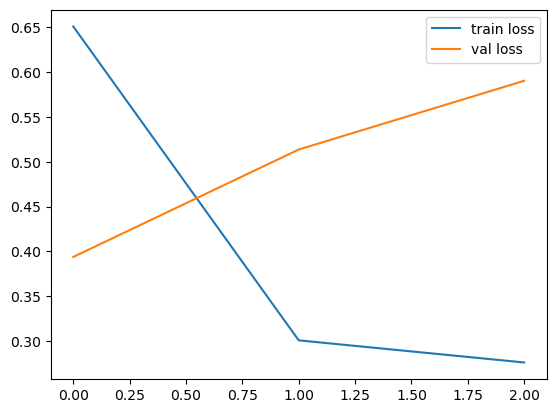

In [146]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

# Plot Accuracy

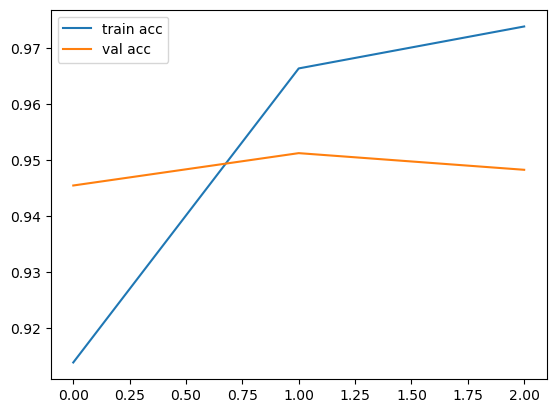

In [147]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [157]:
print("Train Result Accuracy, Loss and Accuracy:",model.evaluate(train_generator))
print("Test Accuracy, Loss and Accuracy:",model.evaluate(test_generator))

275/275 [==============================] - 449s 2s/step - loss: 0.2673 - accuracy: 0.9761
Train Result Accuracy, Loss and Accuracy: [0.26725998520851135, 0.9760624170303345]
93/93 [==============================] - 144s 2s/step - loss: 0.5889 - accuracy: 0.9484
Test Accuracy, Loss and Accuracy: [0.5889386534690857, 0.9484072923660278]


# Confusion Matrix (To Do)